BGI Stereoseq analysis for dataset "cDNA4" chip #SS200000379BR_C4

In [1]:
import os, glob
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# modify path so we can import a custom module
import sys
sys.path.append('.')

from segmentation import SpotTable, run_baysor

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


In [2]:
data_path = '../../../data/BGI_data/cDNA4/'
data_file = data_path + 'mouse-lasso.gem'
cache_file = data_file + '.npz'

if not os.path.exists(cache_file):
    print(f"Loading {data_file}..")

    dtype = [('gene', 'S20'), ('x', 'uint16'), ('y', 'uint16'), ('MIDcounts', int)]
    raw_data = np.loadtxt(data_file, skiprows=1, usecols=[0, 1, 2, 3], delimiter='\t', dtype=dtype)

    # convert genes to int ID
    genes = np.unique(raw_data['gene'])
    gene_map = {gene:i for i, gene in enumerate(genes)}
    data = np.empty(len(raw_data), dtype=[('gene', int), ('x', 'float32'), ('y', 'float32'), ('count', 'uint8')])
    data['x'] = raw_data['x']
    data['y'] = raw_data['y']
    data['count'] = raw_data['MIDcounts']
    data['gene'] = [gene_map[g] for g in raw_data['gene']]    
    
    print("Recompressing to npz..")
    np.savez_compressed(cache_file, data=data, genes=genes)
else:
    print("Loading from cache..")
    items = np.load(cache_file)
    data = items['data']
    genes = items['genes']


Loading from cache..


In [7]:
print(data.shape)
print(len(genes))

(66963090,)
26556


In [3]:
table = SpotTable(data)

In [4]:
sub = table.get_subregion(xlim=(13000, 15000), ylim=(15000, 17000))

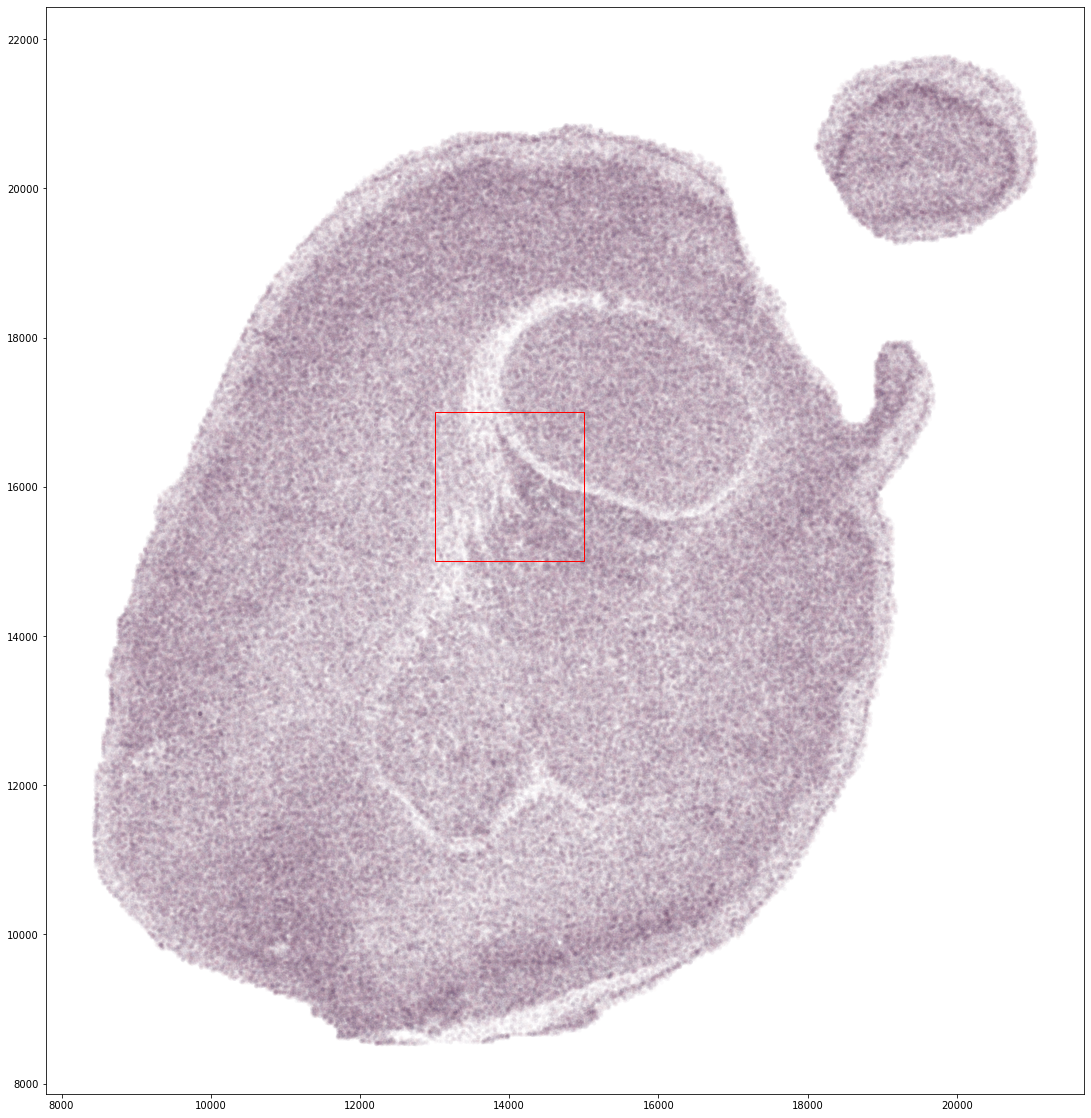

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
table[::100].scatter_plot(ax=ax, alpha=0.03)
sub.plot_rect(ax, 'r')

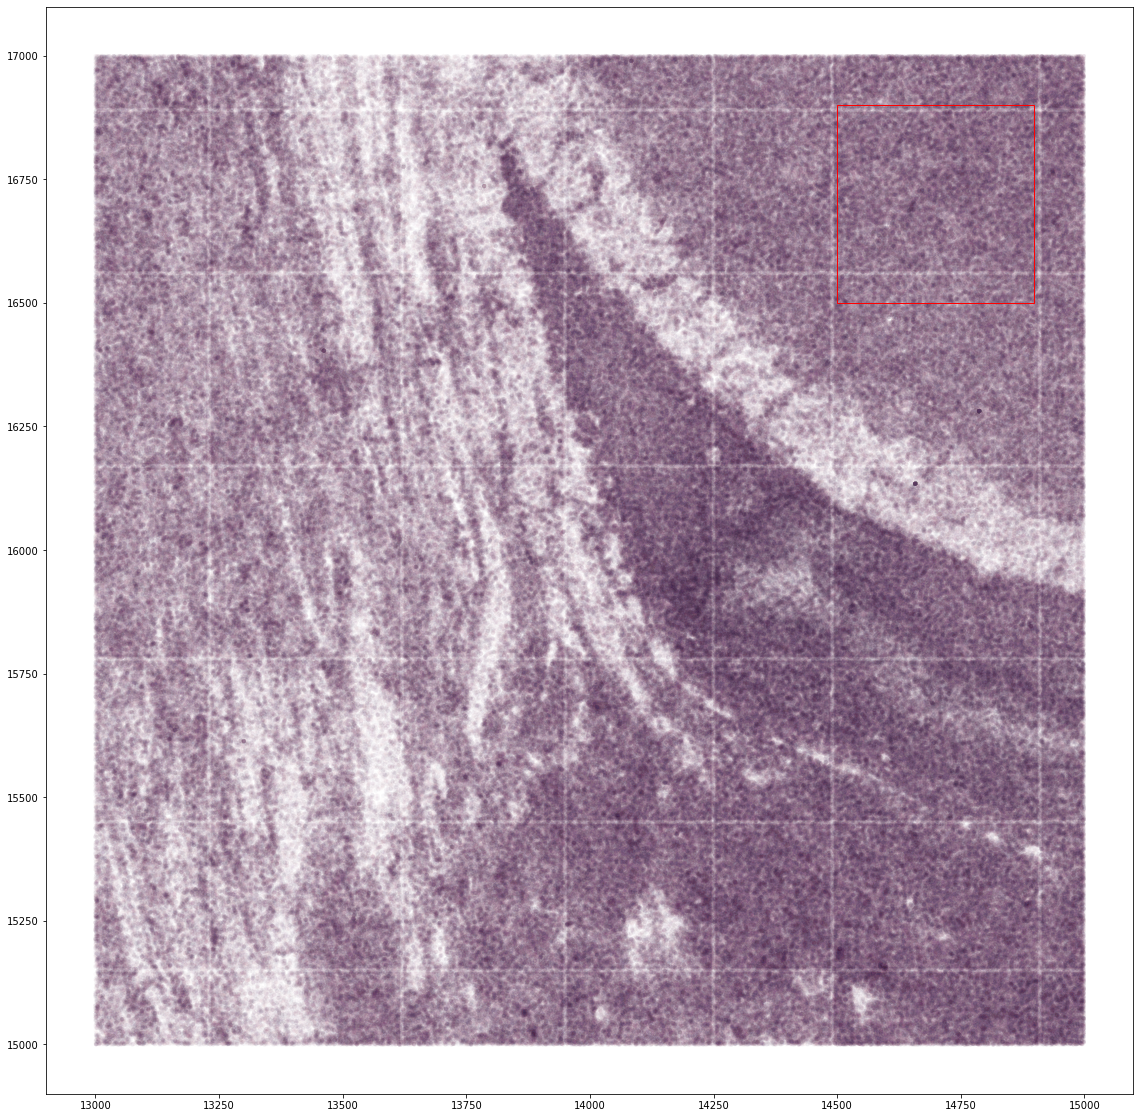

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
sub.scatter_plot(ax=ax, alpha=0.03)
sub2 = sub.get_subregion(xlim=(14500, 14900), ylim=(16500, 16900))
sub2.plot_rect(ax, 'r')

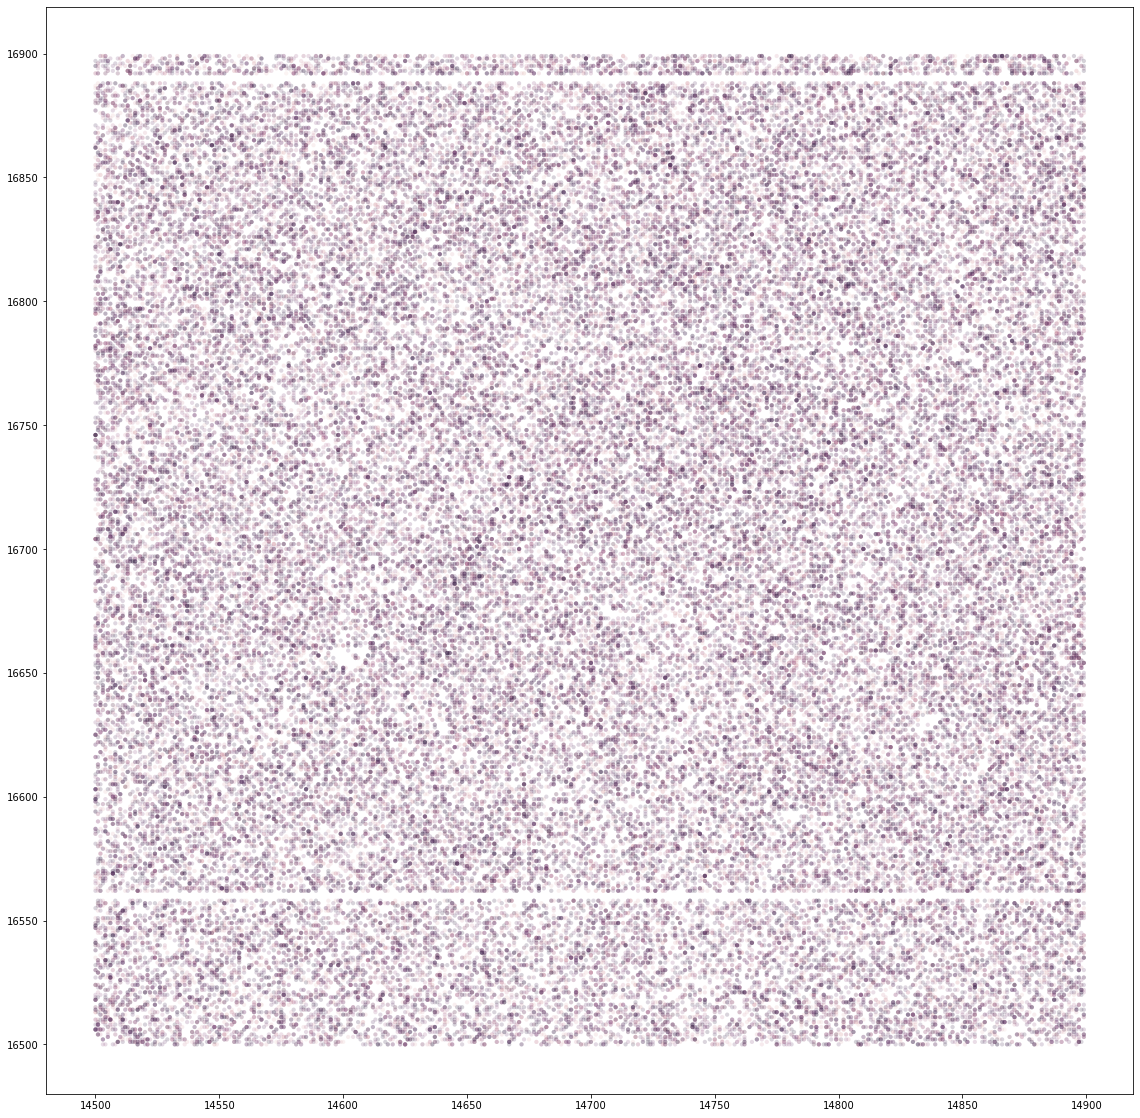

In [12]:


fig, ax = plt.subplots(figsize=(20, 20))
sub2.scatter_plot(ax=ax, alpha=0.2, color='gene')

Binning expression counts..


  0%|          | 0/40 [00:00<?, ?it/s]

Reducing binned expression counts..


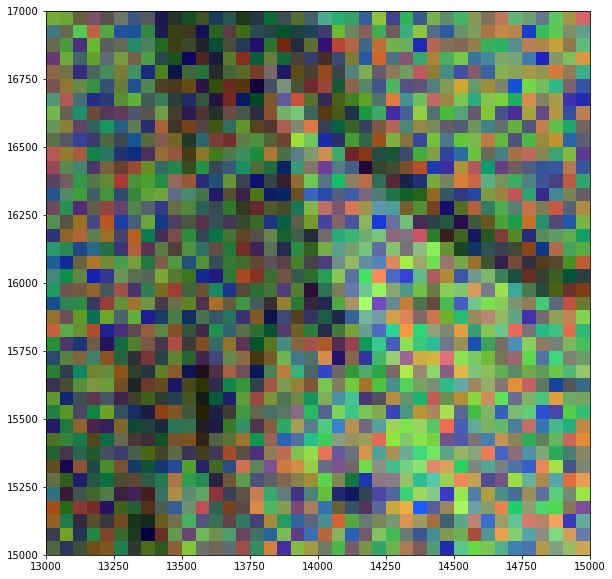

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
sub.reduced_expression_map(binsize=50, ax=ax, umap_args=dict(
    min_dist=0.4,
    n_neighbors=10,
    random_state=0,
));

Binning expression counts..


  0%|          | 0/64 [00:00<?, ?it/s]

Reducing binned expression counts..


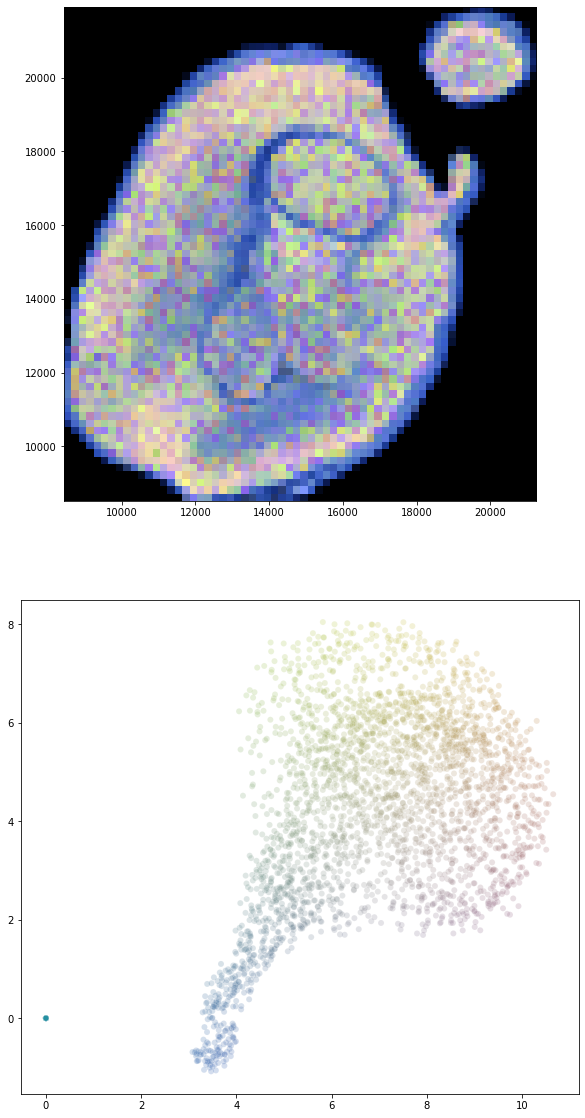

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))
table.reduced_expression_map(binsize=200, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.4,
    n_neighbors=10,
    random_state=0,
));

Binning expression counts..


  0%|          | 0/40 [00:00<?, ?it/s]

Reducing binned expression counts..


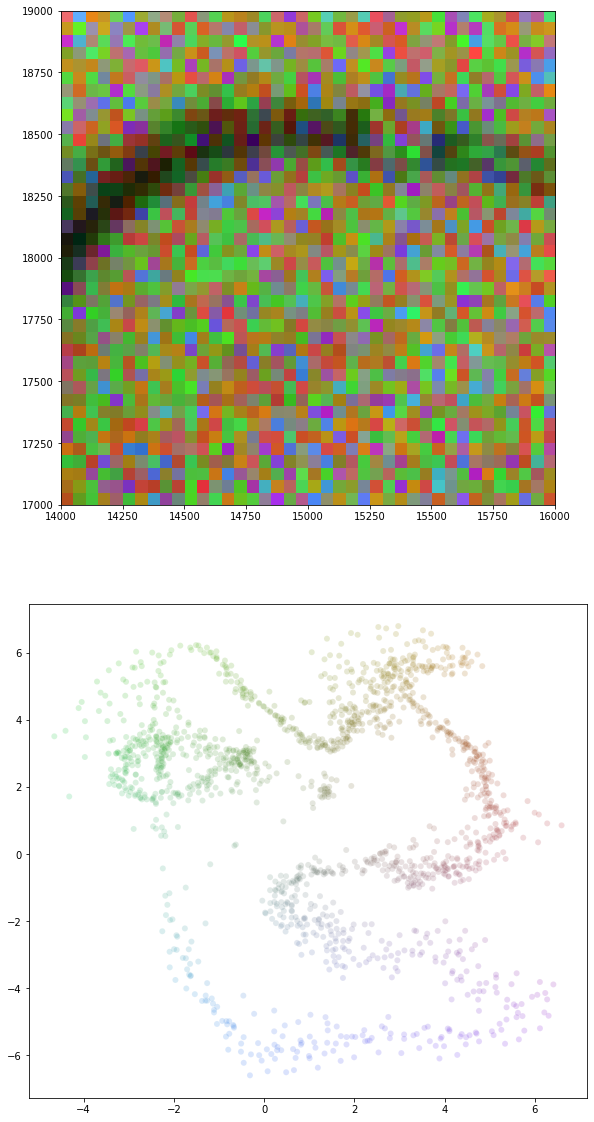

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))
sub = table.get_subregion(xlim=(14000, 16000), ylim=(17000, 19000))
sub.reduced_expression_map(binsize=50, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.1,
    n_neighbors=3,
    random_state=0,
));

Binning expression counts..


  0%|          | 0/64 [00:00<?, ?it/s]

Reducing binned expression counts..


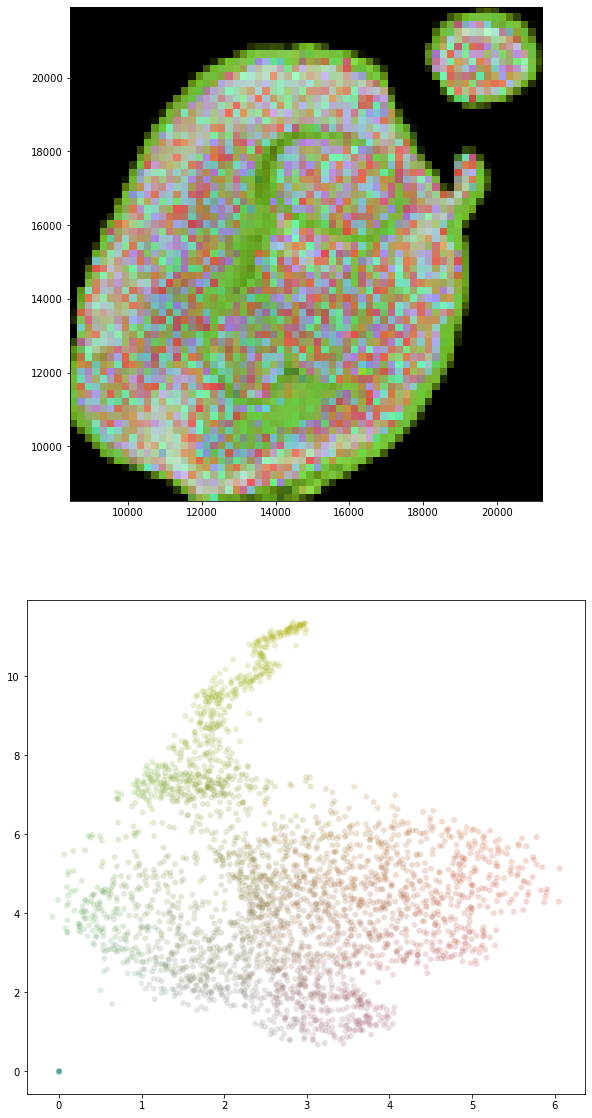

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))
table.reduced_expression_map(binsize=200, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.2,
    n_neighbors=5,
    random_state=0,
));

### Note: squiggles in UMAP are an indication that there is very little overlap in gene expression between bins

Binning expression counts..


  0%|          | 0/100 [00:00<?, ?it/s]

Reducing binned expression counts..


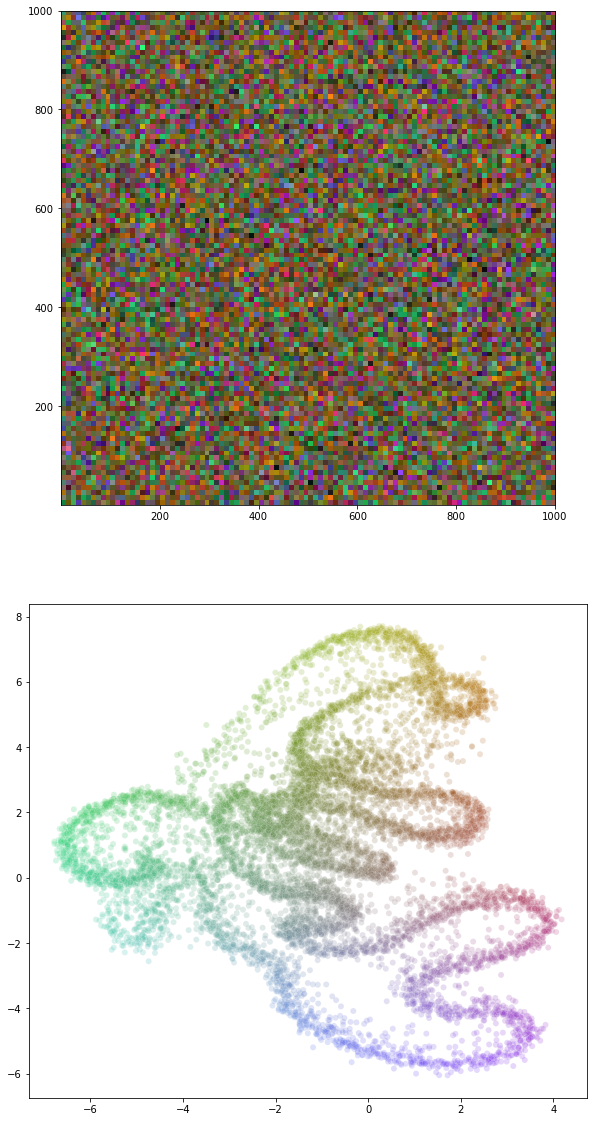

In [106]:
N = 100000
data = np.empty(N, dtype=[('x', float), ('y', float), ('gene', int)])
data['x'] = np.random.uniform(0, 1000, size=N)
data['y'] = np.random.uniform(0, 1000, size=N)
data['gene'] = np.random.randint(0, 10000, size=N)
test_table = SpotTable(data)

fig, ax = plt.subplots(2, 1, figsize=(10, 20))
test_table.reduced_expression_map(binsize=10, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.4,
    n_neighbors=10,
    random_state=0,
));

Load segmented data with cell IDs

In [9]:
data_path = '../../../data/BGI_data/cDNA4/'
data_file = data_path + 'sample_cDNAC4_bin100.tsv'
cache_file = data_file + '.npz'

if not os.path.exists(cache_file):
    print(f"Loading {data_file}..")

    dtype = [('gene', 'S20'), ('x', 'uint16'), ('y', 'uint16'), ('counts', 'ubyte'), ('cell', 'S30')]
    raw_data = np.loadtxt(data_file, skiprows=1, usecols=[0, 1, 2, 3, 4], delimiter='\t', dtype=dtype)

    # convert genes to int ID
    genes = np.unique(raw_data['gene'])
    gene_map = {gene:i for i, gene in enumerate(genes)}

    # convert cells to int ID
    cells = np.unique(raw_data['cell'])
    cell_map = {cell:i for i, cell in enumerate(cells)}
    
    data = np.empty(len(raw_data), dtype=[('gene', int), ('x', 'float32'), ('y', 'float32'), ('count', 'uint8'), ('cell', 'int32')])
    data['x'] = raw_data['x']
    data['y'] = raw_data['y']
    data['count'] = raw_data['counts']
    data['gene'] = [gene_map[g] for g in raw_data['gene']]    
    data['cell'] = [cell_map[c] for c in raw_data['cell']]    
    
    print("Recompressing to npz..")
    np.savez_compressed(cache_file, data=data, genes=genes, cells=cells)
else:
    print("Loading from cache..")
    items = np.load(cache_file)
    data = items['data']
    genes = items['genes']
    cells = items['cells']


Loading from cache..


In [10]:
table = SpotTable(data, cell_ids=data['cell'])

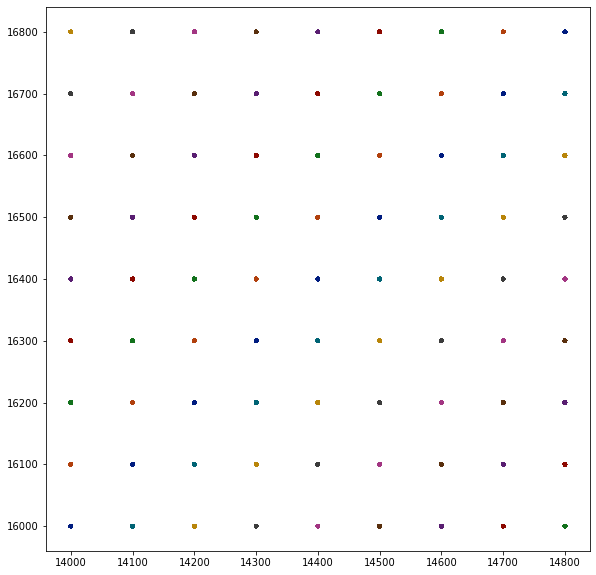

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
table.get_subregion(xlim=(14000, 14900), ylim=(16000, 16900)).cell_scatter_plot(ax=ax)

Turns out spot locations are rounded to 100 um in this table, so we can't evaluate the quality of segmentation from here.. but we can export a cell x gene table:

In [10]:
n_genes = len(genes)
n_cells = len(cells)

print(f"{n_genes} genes * {n_cells} cells = {n_genes * n_cells * 8 / 1e9} GB")

26556 genes * 10801 cells = 2.294650848 GB


In [17]:
dtype = [('cell', 'S30')] + [(gene.decode(), 'uint16') for gene in genes]
cell_gene_table = np.zeros(n_cells, dtype=dtype)
cell_gene_table['cell'] = cells
for row in data:
    cell_gene_table[row['cell']][genes[row['gene']].decode()] += row['count']

In [24]:
header = ','.join([field[0] for field in dtype])
fmt = ','.join(['%s'] + ['%d'] * len(genes))
with open(data_path + 'cell_gene_table.csv', 'w') as fh:
    fh.write(header + '\n')
    for row in cell_gene_table:
        fh.write(fmt % ((row[0].decode(),) + tuple(row)[1:]))
        fh.write('\n')